Neural network model - ML project

Neural network structure

      Input Layer           Hidden Layer 1        Hidden Layer 2         Output Layer
         (X)                    (A[1])                (A[2])                (A[3])
          |                        |                     |                      |
          v                        v                     v                      v
          |                        |                     |                      |
          +----> [W1, b1] -----> ReLU ----> [W2, b2] -----> ReLU ----> [W_out, b_out] -----> Sigmoid
                                            ↑
                                            |
                                         ReLU
                                            ↑
                                         ReLU

Data Source: "https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/data"
Objective: utilize neural network models to predict default events

General sections
1. run a single model and check its metrics like accuracy, etc
2. fine-tune the model by changing hyerparameters like batch number, etc, to check variation of models regarding metrics
3. fine-tune the model by changing stracture, by changing neuron numbers in each layer


To compare the differences between the models, analyze various aspects such as their architecture, performance metrics (e.g., accuracy, loss), convergence behavior, and any changes made during fine-tuning. Below, I'll outline steps to compare these aspects:

Performance Metrics Comparison: Compare the performance metrics (e.g., accuracy, loss) of the models on the test dataset. 

Type 0 trial:

Multiple training sessions and results comparison.

Type 1 trial and finetuning:

Architecture Comparison: Check if there were any changes in the architecture of the models during fine-tuning. 

Type 2 trial and finetuning:

Hyperparameter Changes: adjust any hyperparameters during fine-tuning, compare these changes and their impact on model performance.

Convergence Behavior: Plot the training histories of the models.



Section 1 Single model

Step 1: Data Preprocessing(better treating categorical variables)


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tkinter as tk
from tkinter import filedialog

# No full GUI, keep the root window from appearing
root = tk.Tk()
root.withdraw()

# Open file dialog to choose the dataset file
file_path = filedialog.askopenfilename()
if not file_path:
    print("No file selected. Exiting...")
    exit()

# Data Loading
print("Loading data from file...")
df = pd.read_csv(file_path)

# Separate features and target variable
X = df.drop(columns=['ID', 'default.payment.next.month']).values
y = df['default.payment.next.month'].values

# Categorical columns
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
X_cat = encoder.fit_transform(df[categorical_cols])

# Combine one-hot encoded features with numerical features
X = pd.concat([pd.DataFrame(X_cat), df.drop(columns=categorical_cols+['ID', 'default.payment.next.month'])], axis=1).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Loading data from file...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


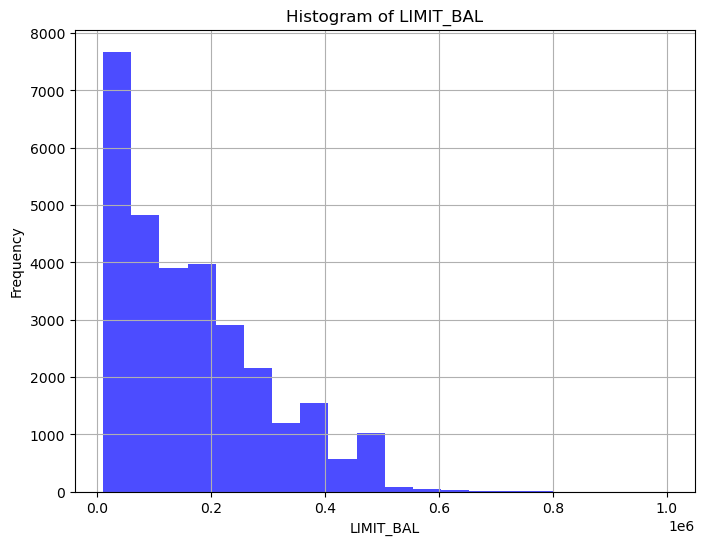

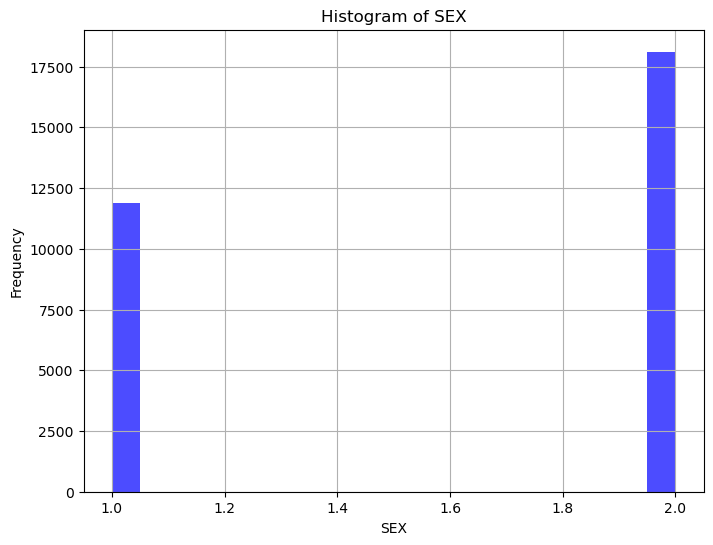

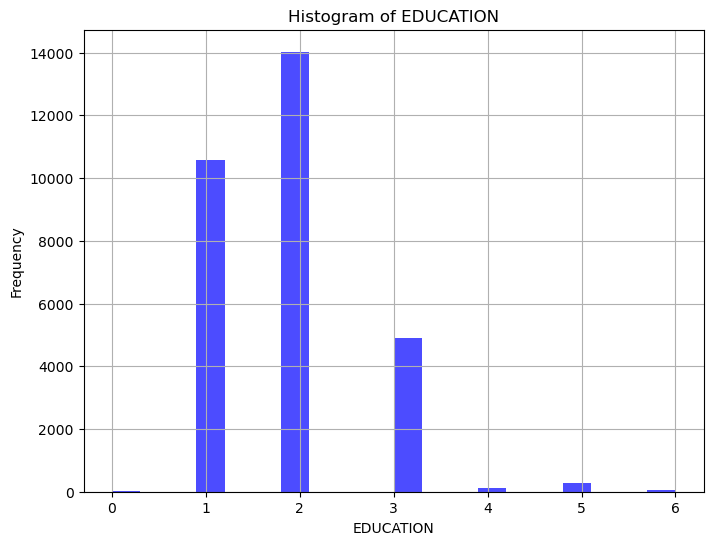

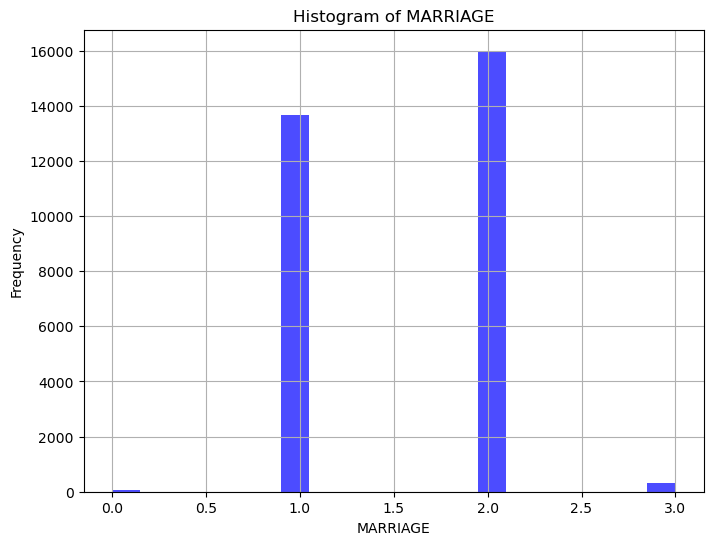

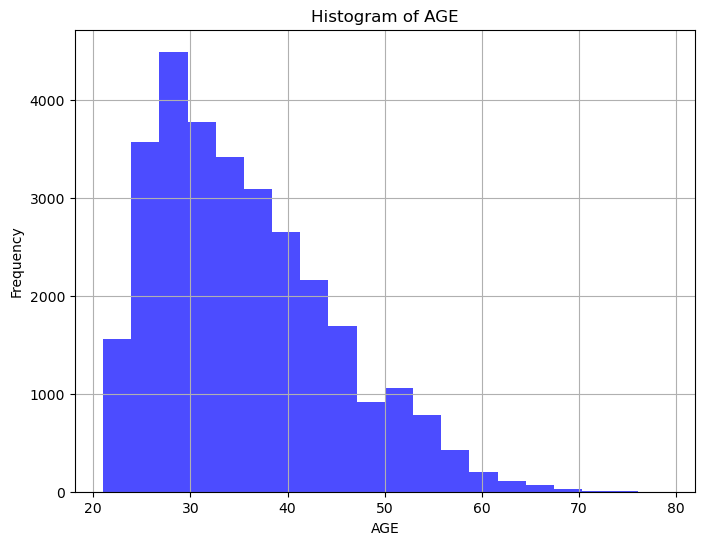

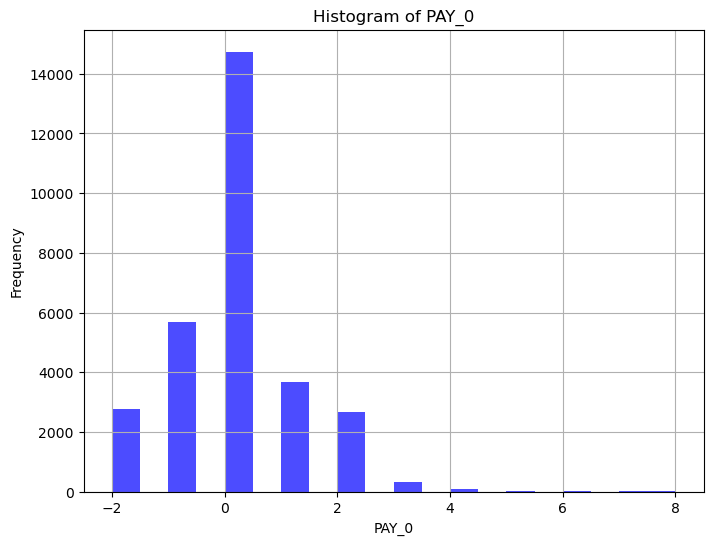

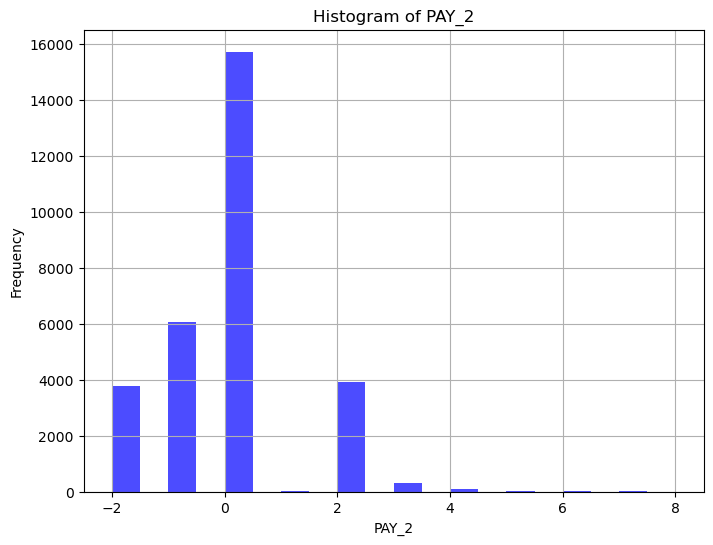

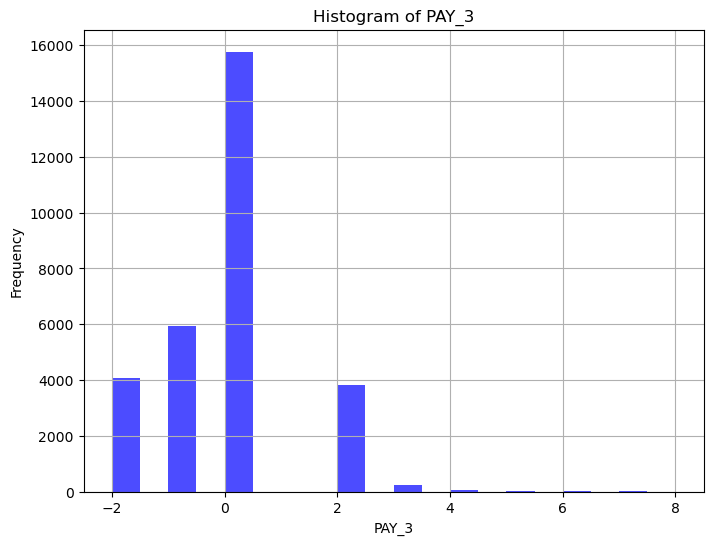

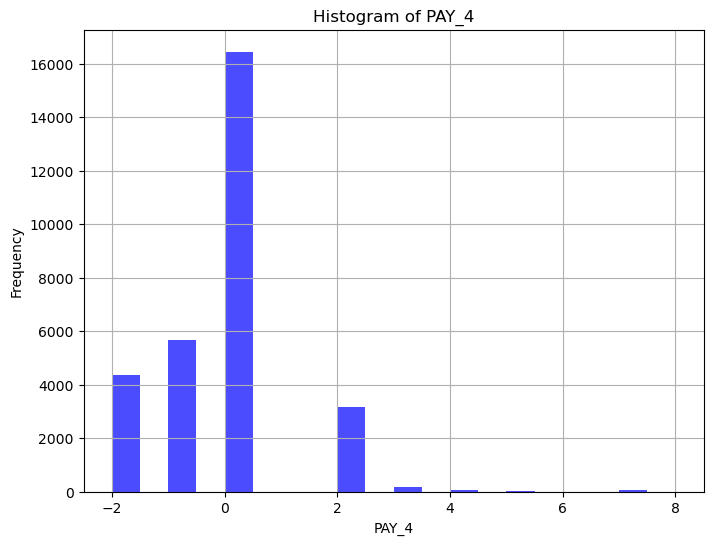

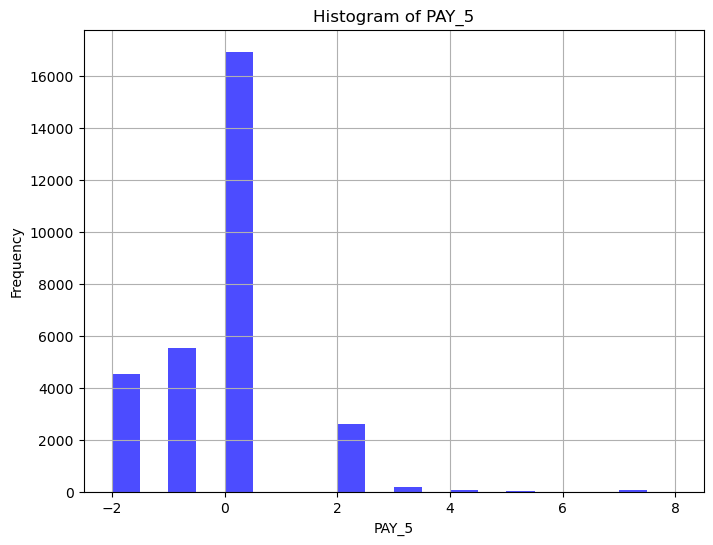

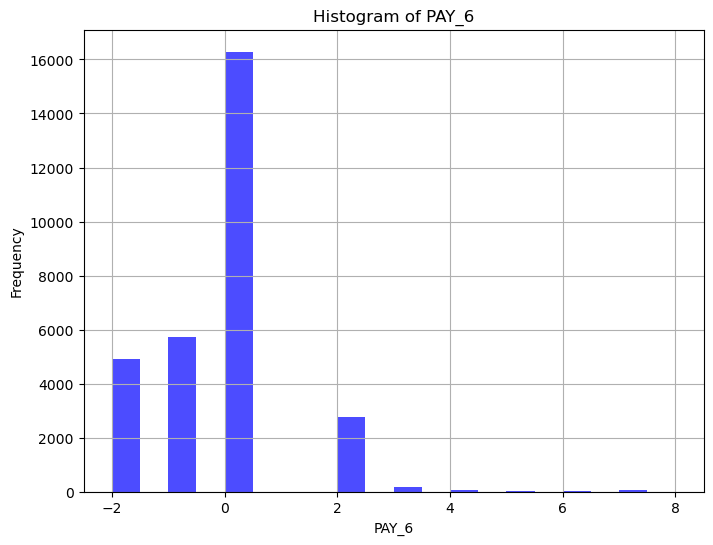

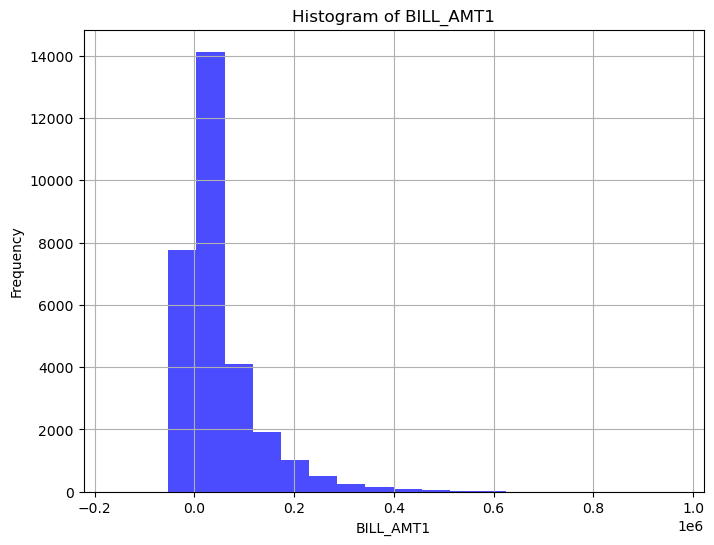

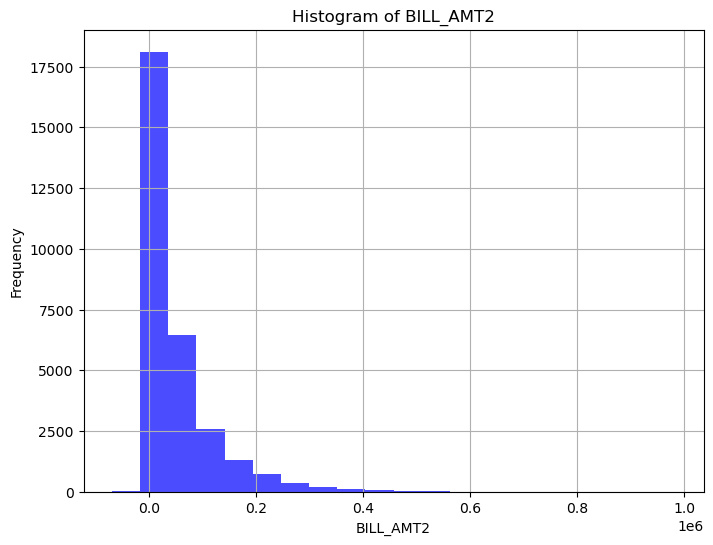

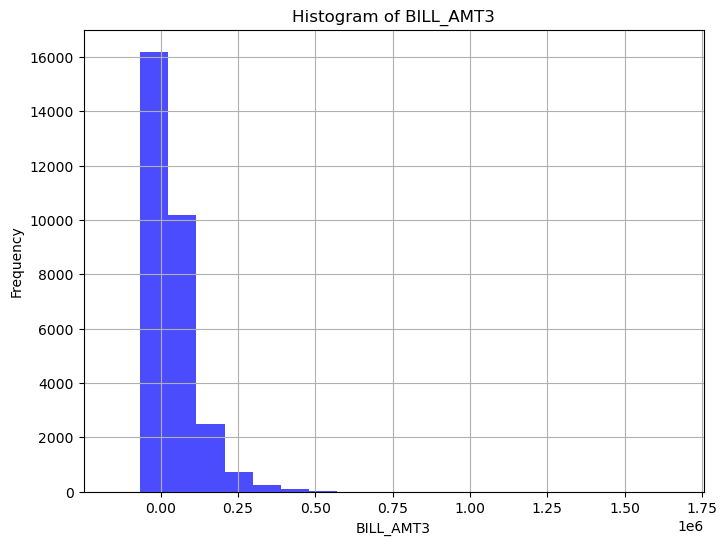

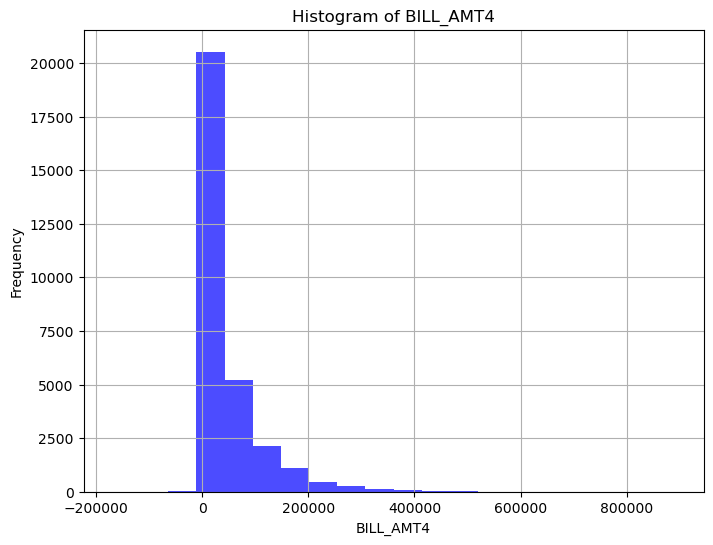

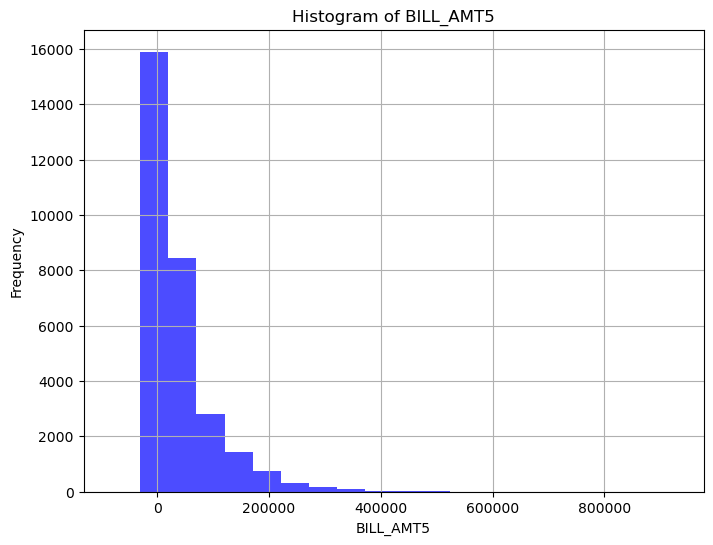

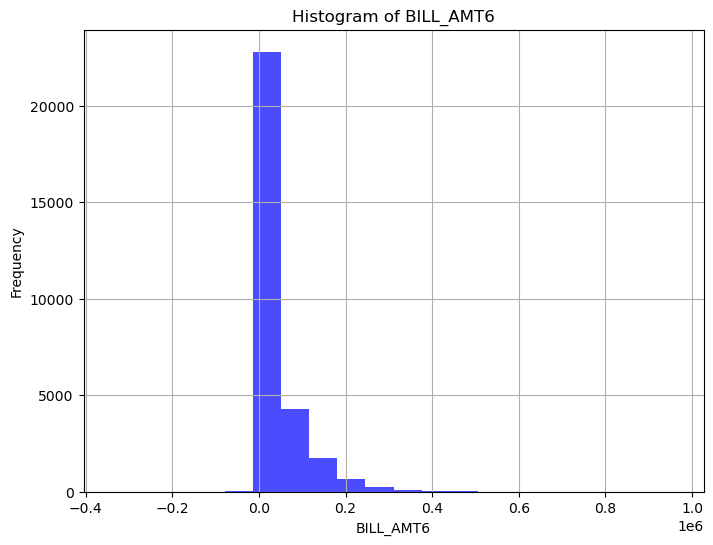

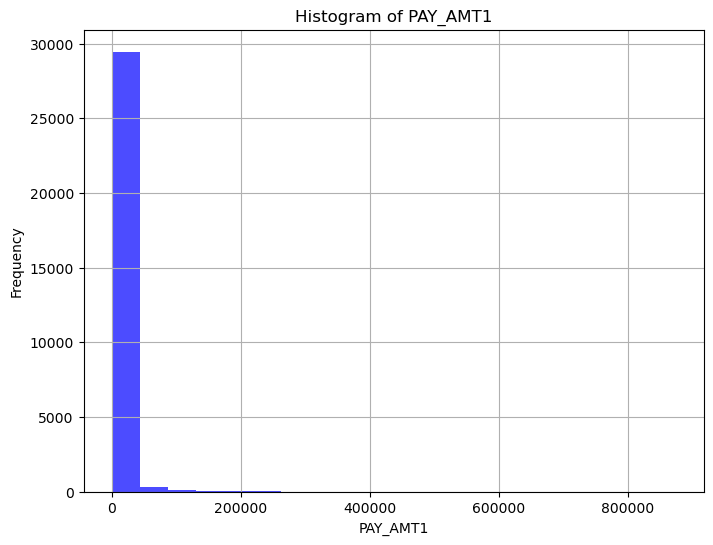

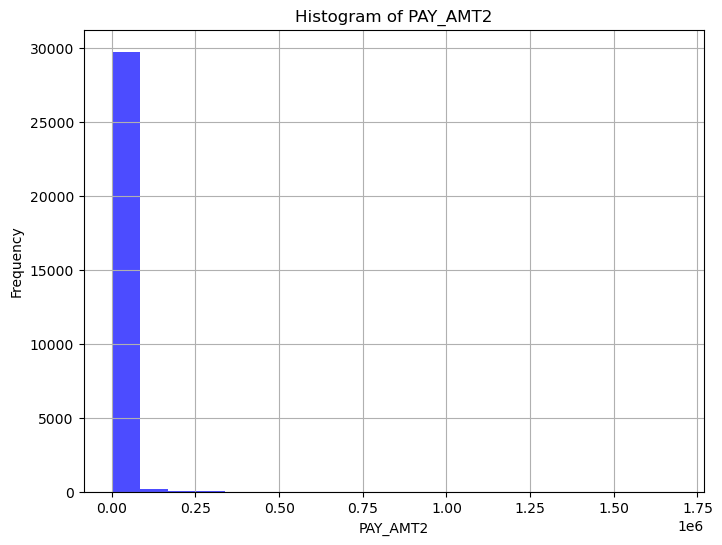

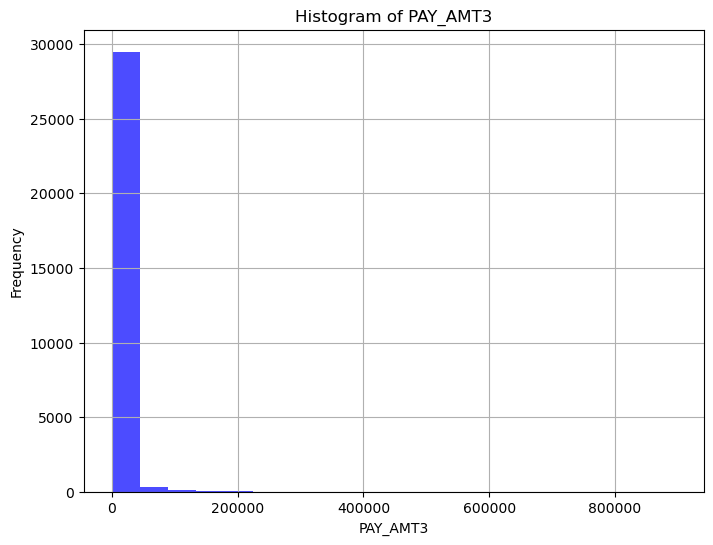

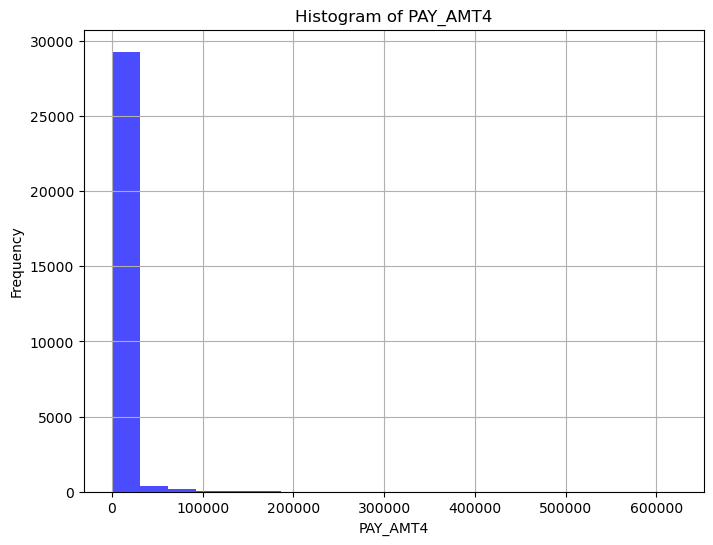

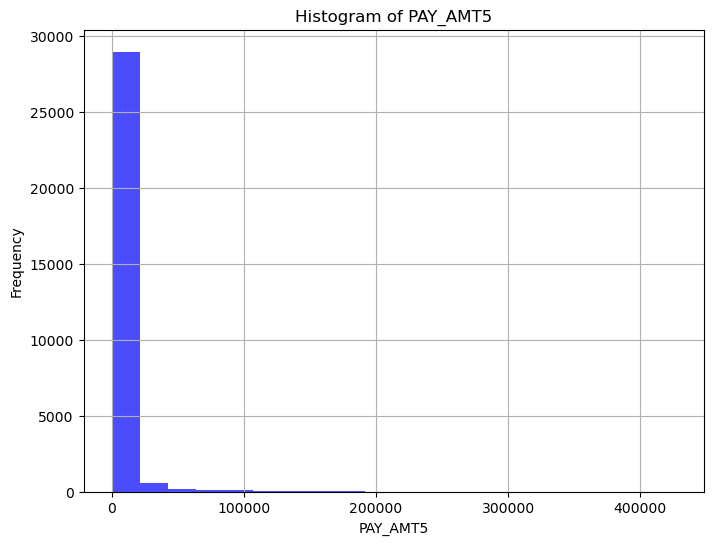

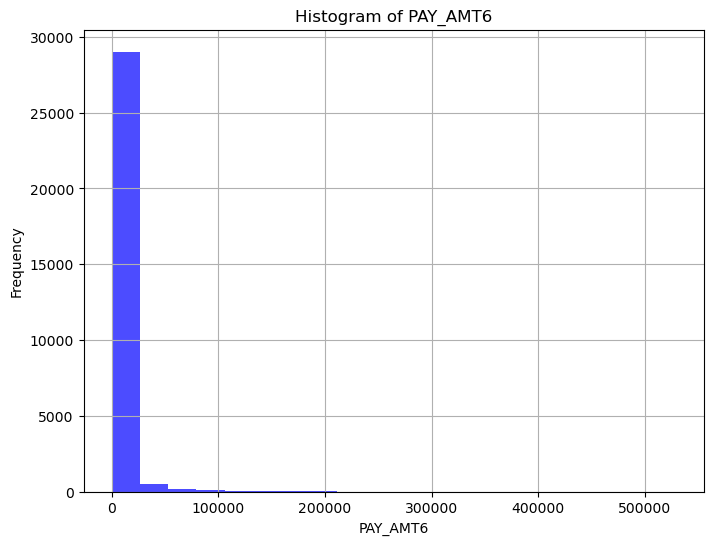

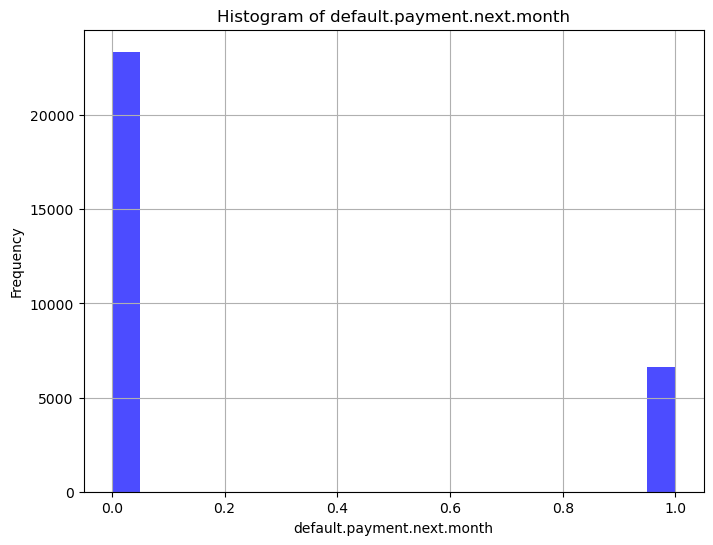

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop the ID column as it's not relevant for histogram plotting
df.drop(columns=["ID"], inplace=True)

# Plot histograms for each variable
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='blue', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


Step 2: Model Architecture


In [2]:
#pip install tensorflow


In [3]:
import tensorflow as tf

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


Step 3: Training


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
original_history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Train the original model verbose?
# original_history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Original Model Test Accuracy:", accuracy)


Epoch 1/20


600/600 [==============================] - 2s 2ms/step - loss: 0.4559 - accuracy: 0.8127 - val_loss: 0.4424 - val_accuracy: 0.8190
Epoch 2/20
600/600 [==============================] - 1s 1ms/step - loss: 0.4303 - accuracy: 0.8239 - val_loss: 0.4486 - val_accuracy: 0.8138
Epoch 3/20
600/600 [==============================] - 1s 1ms/step - loss: 0.4237 - accuracy: 0.8238 - val_loss: 0.4428 - val_accuracy: 0.8146
Epoch 4/20
600/600 [==============================] - 1s 1ms/step - loss: 0.4206 - accuracy: 0.8256 - val_loss: 0.4497 - val_accuracy: 0.8150
Epoch 5/20
600/600 [==============================] - 1s 1ms/step - loss: 0.4176 - accuracy: 0.8260 - val_loss: 0.4531 - val_accuracy: 0.8156
Epoch 6/20
600/600 [==============================] - 1s 1ms/step - loss: 0.4142 - accuracy: 0.8281 - val_loss: 0.4471 - val_accuracy: 0.8115
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.4103 - accuracy: 0.8304 - val_loss: 0.4492 - val_accuracy: 0.8169
Epo

In [5]:
import numpy as np

# Print the summary of the model

model.summary()

# Extracting metrics from the original_history object
training_accuracy = original_history.history['accuracy']
validation_accuracy = original_history.history['val_accuracy']
training_loss = original_history.history['loss']
validation_loss = original_history.history['val_loss']

# Calculating final metrics and variance
final_training_accuracy = training_accuracy[-1]
final_validation_accuracy = validation_accuracy[-1]
final_training_loss = training_loss[-1]
final_validation_loss = validation_loss[-1]
variance_accuracy = np.var(validation_accuracy)
variance_loss = np.var(validation_loss)

# Printing the metrics
print("\nModel Performance Metrics:")
print(f"Final Training Accuracy: {final_training_accuracy*100:.2f}%")
print(f"Final Validation Accuracy: {final_validation_accuracy*100:.2f}%")
print(f"Training Accuracy Variance: {np.var(training_accuracy):.4f}")
print(f"Validation Accuracy Variance: {variance_accuracy:.4f}")
print(f"Final Training Loss: {final_training_loss:.4f}")
print(f"Final Validation Loss: {final_validation_loss:.4f}")
print(f"Training Loss Variance: {np.var(training_loss):.4f}")
print(f"Validation Loss Variance: {variance_loss:.4f}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               11776     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 20097 (78.50 KB)
Trainable params: 20097 (78.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Model Performance Metrics:
Final Training Accuracy: 84.64%
Final Validation Accuracy: 79.31%
Training Accuracy Variance: 0.0001
Validation Accuracy Variance: 0.0000
Final Training Loss: 0.3690
Final Validation Loss: 0.4947
Training Loss Variance: 0.0004
Validation Loss Variance: 0.0

Step 4: Evaluation by adding additional training sessions


Compare additional three training sessions

In [6]:
# Function to create and compile model
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

models = []
histories = []
val_accuracies = []
test_metrics = []

for i in range(3):  # Example: fine-tuning three times
    model = create_model()
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)  # Set verbose to 0 to reduce log noise
    print(f"Model {i+1} - Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    histories.append(history)
    models.append(model)
    test_metrics.append((loss, accuracy))
    
    # Get the last epoch metrics from the training history
    final_training_accuracy = history.history['accuracy'][-1]
    final_training_loss = history.history['loss'][-1]
    final_val_accuracy = history.history['val_accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]
    val_accuracies.append(final_val_accuracy)
    
    # Printing the detailed metrics
    print(f"Model {i+1} Training Metrics - Final Training Accuracy: {final_training_accuracy:.4f}, Final Training Loss: {final_training_loss:.4f}")
    print(f"Model {i+1} Validation Metrics - Final Validation Accuracy: {final_val_accuracy:.4f}, Final Validation Loss: {final_val_loss:.4f}")
    
    model.summary()

# Identifying the best model based on validation accuracy
best_model_index = val_accuracies.index(max(val_accuracies))
best_model = models[best_model_index]
best_test_loss, best_test_accuracy = test_metrics[best_model_index]

print(f"\nBest Model is Model {best_model_index + 1} with Test Loss: {best_test_loss:.4f} and Test Accuracy: {best_test_accuracy:.4f}")



Model 1 - Test Loss: 0.4874, Test Accuracy: 0.8038
Model 1 Training Metrics - Final Training Accuracy: 0.8461, Final Training Loss: 0.3688
Model 1 Validation Metrics - Final Validation Accuracy: 0.8071, Final Validation Loss: 0.4817
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               11776     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 20097 (78.50 KB)
Trainable params: 20097 (78.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model 2 - Test Loss: 0.4910, Test Accuracy: 0.809

Step 5: Visual Comparison

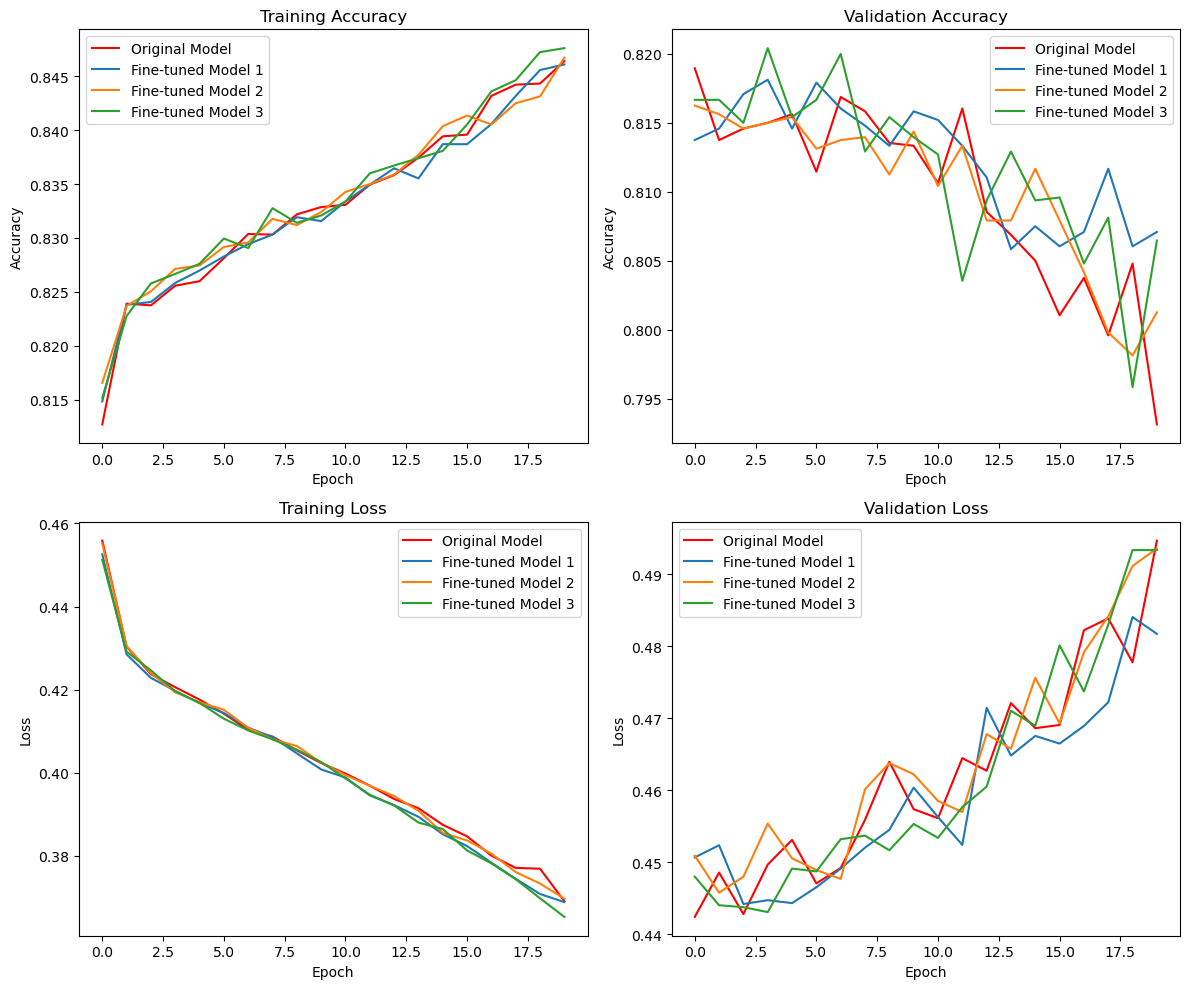

In [7]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(12, 10))

# Compare training accuracy
plt.subplot(2, 2, 1)
plt.plot(original_history.history['accuracy'], label='Original Model', color='red')
for i, history in enumerate(histories):
    plt.plot(history.history['accuracy'], label=f'Fine-tuned Model {i+1}')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Compare validation accuracy
plt.subplot(2, 2, 2)
plt.plot(original_history.history['val_accuracy'], label='Original Model', color='red')
for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=f'Fine-tuned Model {i+1}')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Compare training loss
plt.subplot(2, 2, 3)
plt.plot(original_history.history['loss'], label='Original Model', color='red')
for i, history in enumerate(histories):
    plt.plot(history.history['loss'], label=f'Fine-tuned Model {i+1}')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Compare validation loss
plt.subplot(2, 2, 4)
plt.plot(original_history.history['val_loss'], label='Original Model', color='red')
for i, history in enumerate(histories):
    plt.plot(history.history['val_loss'], label=f'Fine-tuned Model {i+1}')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Step 6: Sampling 20 cases to check the model

1/1 [==============================] - 0s 20ms/step


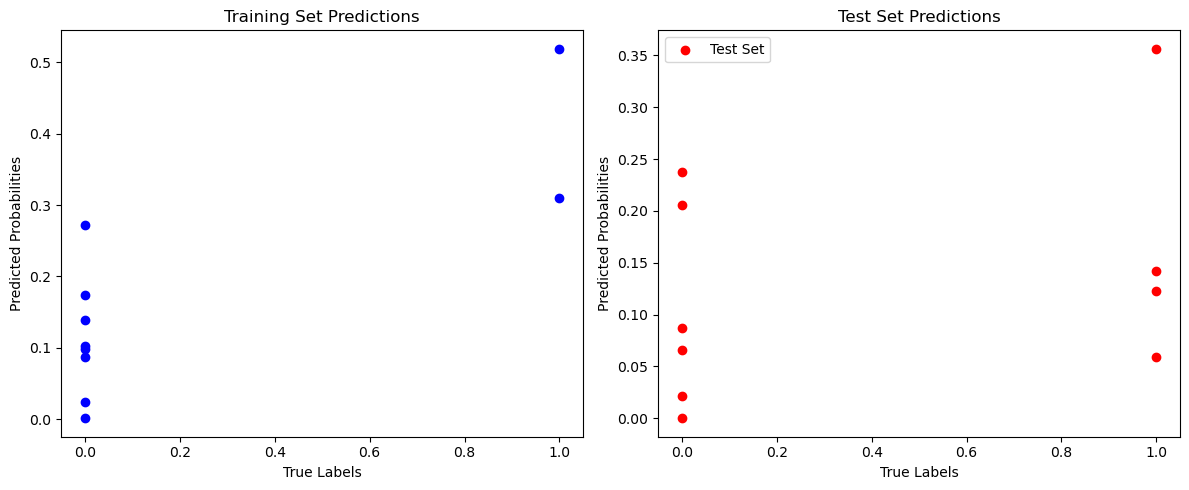

In [8]:
import random
import matplotlib.pyplot as plt

# Randomly select 10 cases from the training set
random.seed(42)  # for reproducibility
train_indices = random.sample(range(len(X_train)), k=10)
test_indices = random.sample(range(len(X_test)), k=10)

# Function to decode model output
def decode_output(output):
    return 1 if output >= 0.5 else 0

# Initialize lists to store predictions
train_true_labels = []
train_predicted_labels = []
train_predicted_probs = []

test_true_labels = []
test_predicted_labels = []
test_predicted_probs = []

# Make predictions on the training set
for idx in train_indices:
    input_sample = X_train[idx]
    true_label = y_train[idx]
    predicted_prob = model.predict(input_sample.reshape(1, -1))[0, 0]
    predicted_label = decode_output(predicted_prob)
    
    train_true_labels.append(true_label)
    train_predicted_labels.append(predicted_label)
    train_predicted_probs.append(predicted_prob)

# Make predictions on the test set
for idx in test_indices:
    input_sample = X_test[idx]
    true_label = y_test[idx]
    predicted_prob = model.predict(input_sample.reshape(1, -1))[0, 0]
    predicted_label = decode_output(predicted_prob)
    
    test_true_labels.append(true_label)
    test_predicted_labels.append(predicted_label)
    test_predicted_probs.append(predicted_prob)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot training predictions
axes[0].scatter(train_true_labels, train_predicted_probs, color='blue', label='Training Set')
axes[0].set_title('Training Set Predictions')
axes[0].set_xlabel('True Labels')
axes[0].set_ylabel('Predicted Probabilities')

# Plot test predictions
axes[1].scatter(test_true_labels, test_predicted_probs, color='red', label='Test Set')
axes[1].set_title('Test Set Predictions')
axes[1].set_xlabel('True Labels')
axes[1].set_ylabel('Predicted Probabilities')

plt.tight_layout()
plt.legend()
plt.show()


step 7: output model layers

In [9]:
for layer in model.layers:
    print(layer.get_config())  # Print layer's configuration
    print(layer.get_weights())  # Print layer's weights


{'name': 'dense_9', 'trainable': True, 'dtype': 'float32', 'batch_input_shape': (None, 91), 'units': 128, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[ 0.13239932, -0.03825978, -0.10319452, ..., -0.16205542,
        -0.13940139,  0.2677684 ],
       [ 0.00473295, -0.12608987, -0.18208343, ...,  0.1472235 ,
         0.13748474, -0.2805138 ],
       [ 0.29030785, -0.08532255,  0.22759183, ...,  0.10514984,
        -0.03552388,  0.27803218],
       ...,
       [-0.08121741, -0.09746833, -0.19118749, ...,  0.05381406,
        -0.30578998, -0.04809258],
       [ 0.13815905, -0.01368143,  0.18784279, ...,

Section 2: Hyperparameter fintuning

Step 1: variations setting
now creat more models to fine tune : epochs +- 10 holding others constant. Batch +-10 holding others constant. Validation split+- 0,1 holding others constant.
Changing hyper parameters to check different models.

In [10]:
import numpy as np

# Function to create, train, and evaluate the model with variations
def train_model_with_variation(epochs_variation=0, batch_size_variation=0, validation_split_variation=0.0):
    model_variation = create_model()  # Assuming create_model() creates the same model architecture
    epochs = 20 + epochs_variation
    batch_size = 32 + batch_size_variation
    validation_split = 0.2 + validation_split_variation
    history = model_variation.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, verbose=0)
    loss, accuracy = model_variation.evaluate(X_test, y_test, verbose=0)  # Set verbose to 0 for cleaner output
    # Extract the final training and validation metrics
    final_training_accuracy = history.history['accuracy'][-1]
    final_validation_accuracy = history.history['val_accuracy'][-1]
    final_training_loss = history.history['loss'][-1]
    final_validation_loss = history.history['val_loss'][-1]
    return history, loss, accuracy, final_training_loss, final_validation_loss, final_training_accuracy, final_validation_accuracy

# Create and train models with variations
variations = [
    (1, 0, 0.0),  # Increase epochs by 1
    (-1, 0, 0.0),  # Decrease epochs by 1
    (0, 10, 0.0),  # Increase batch size by 10
    (0, -10, 0.0),  # Decrease batch size by 10
    (0, 0, 0.1),  # Increase validation split by 0.1
    (0, 0, -0.1),  # Decrease validation split by 0.1
    (1, 10, 0.0),  # Increase epochs by 1 and batch size by 10
    (-1, -10, 0.0),  # Decrease epochs by 1 and batch size by 10
    (1, 0, -0.1),  # Increase epochs by 1 and decrease validation split by 0.1
    (-1, 0, 0.1)   # Decrease epochs by 1 and increase validation split by 0.1
]

histories = []
losses = []
accuracies = []
training_losses = []
validation_losses = []
training_accuracies = []
validation_accuracies = []

for variation in variations:
    history, test_loss, test_accuracy, final_training_loss, final_validation_loss, final_training_accuracy, final_validation_accuracy = train_model_with_variation(*variation)
    histories.append(history)
    losses.append(test_loss)
    accuracies.append(test_accuracy)
    training_losses.append(final_training_loss)
    validation_losses.append(final_validation_loss)
    training_accuracies.append(final_training_accuracy)
    validation_accuracies.append(final_validation_accuracy)

# Print metrics for each variation
for i, variation in enumerate(variations):
    print(f"Variation {i+1}: Training Accuracy = {training_accuracies[i]*100:.2f}%, Validation Accuracy = {validation_accuracies[i]*100:.2f}%, Training Loss = {training_losses[i]:.4f}, Validation Loss = {validation_losses[i]:.4f}, Test Accuracy = {accuracies[i]*100:.2f}%")


Variation 1: Training Accuracy = 84.94%, Validation Accuracy = 80.10%, Training Loss = 0.3615, Validation Loss = 0.4924, Test Accuracy = 81.00%
Variation 2: Training Accuracy = 84.47%, Validation Accuracy = 80.17%, Training Loss = 0.3701, Validation Loss = 0.4917, Test Accuracy = 81.20%
Variation 3: Training Accuracy = 84.44%, Validation Accuracy = 80.23%, Training Loss = 0.3677, Validation Loss = 0.4864, Test Accuracy = 80.40%
Variation 4: Training Accuracy = 84.90%, Validation Accuracy = 80.19%, Training Loss = 0.3664, Validation Loss = 0.4837, Test Accuracy = 80.83%
Variation 5: Training Accuracy = 85.09%, Validation Accuracy = 80.83%, Training Loss = 0.3642, Validation Loss = 0.4861, Test Accuracy = 81.15%
Variation 6: Training Accuracy = 84.32%, Validation Accuracy = 79.96%, Training Loss = 0.3731, Validation Loss = 0.5004, Test Accuracy = 80.68%
Variation 7: Training Accuracy = 84.79%, Validation Accuracy = 79.56%, Training Loss = 0.3663, Validation Loss = 0.4819, Test Accuracy =

Print best model

In [11]:
# Initialize variables for the best model
best_model_index = np.argmax(accuracies)  # Index of the model with the highest test accuracy
best_test_loss = losses[best_model_index]
best_test_accuracy = accuracies[best_model_index]
best_training_loss = training_losses[best_model_index]
best_validation_loss = validation_losses[best_model_index]
best_variation = variations[best_model_index]

# Print the best model's details
print("\nBest Model Details:")
print(f"Variation {best_model_index + 1}:")
print(f"Test Loss = {best_test_loss}, Test Accuracy = {best_test_accuracy}")
print(f"Training Loss = {best_training_loss}, Validation Loss = {best_validation_loss}")
print(f"Variation Parameters: Epochs Variation = {best_variation[0]}, Batch Size Variation = {best_variation[1]}, Validation Split Variation = {best_variation[2]}")

# Print the summary of the best model
print("\nBest Model Summary:")
if 0 <= best_model_index < len(models):  # Ensure the index is valid
    best_model = models[best_model_index]  # Retrieve the best model based on the index
    best_model.summary()
else:
    print("Invalid model index:", best_model_index)



Best Model Details:
Variation 8:
Test Loss = 0.4763542115688324, Test Accuracy = 0.812666654586792
Training Loss = 0.36942601203918457, Validation Loss = 0.48487588763237
Variation Parameters: Epochs Variation = -1, Batch Size Variation = -10, Validation Split Variation = 0.0

Best Model Summary:
Invalid model index: 7


Step 2: plot function preparation

In [12]:
import matplotlib.pyplot as plt

# Function to plot comparison graphs
def plot_comparison_graphs(original_history, histories):
    # Set figure size
    plt.figure(figsize=(12, 10))
    # Compare training accuracy
    plt.subplot(2, 2, 1)
    plt.plot(original_history.history['accuracy'], label='Original Model', color='red')
    for i, history in enumerate(histories):
        plt.plot(history.history['accuracy'], label=f'Model Variation {i+1}')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Compare validation accuracy
    plt.subplot(2, 2, 2)
    plt.plot(original_history.history['val_accuracy'], label='Original Model', color='red')
    for i, history in enumerate(histories):
        plt.plot(history.history['val_accuracy'], label=f'Model Variation {i+1}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Compare training loss
    plt.subplot(2, 2, 3)
    plt.plot(original_history.history['loss'], label='Original Model', color='red')
    for i, history in enumerate(histories):
        plt.plot(history.history['loss'], label=f'Model Variation {i+1}')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Compare validation loss
    plt.subplot(2, 2, 4)
    plt.plot(original_history.history['val_loss'], label='Original Model', color='red')
    for i, history in enumerate(histories):
        plt.plot(history.history['val_loss'], label=f'Model Variation {i+1}')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

Step 3: print summaries and graphs

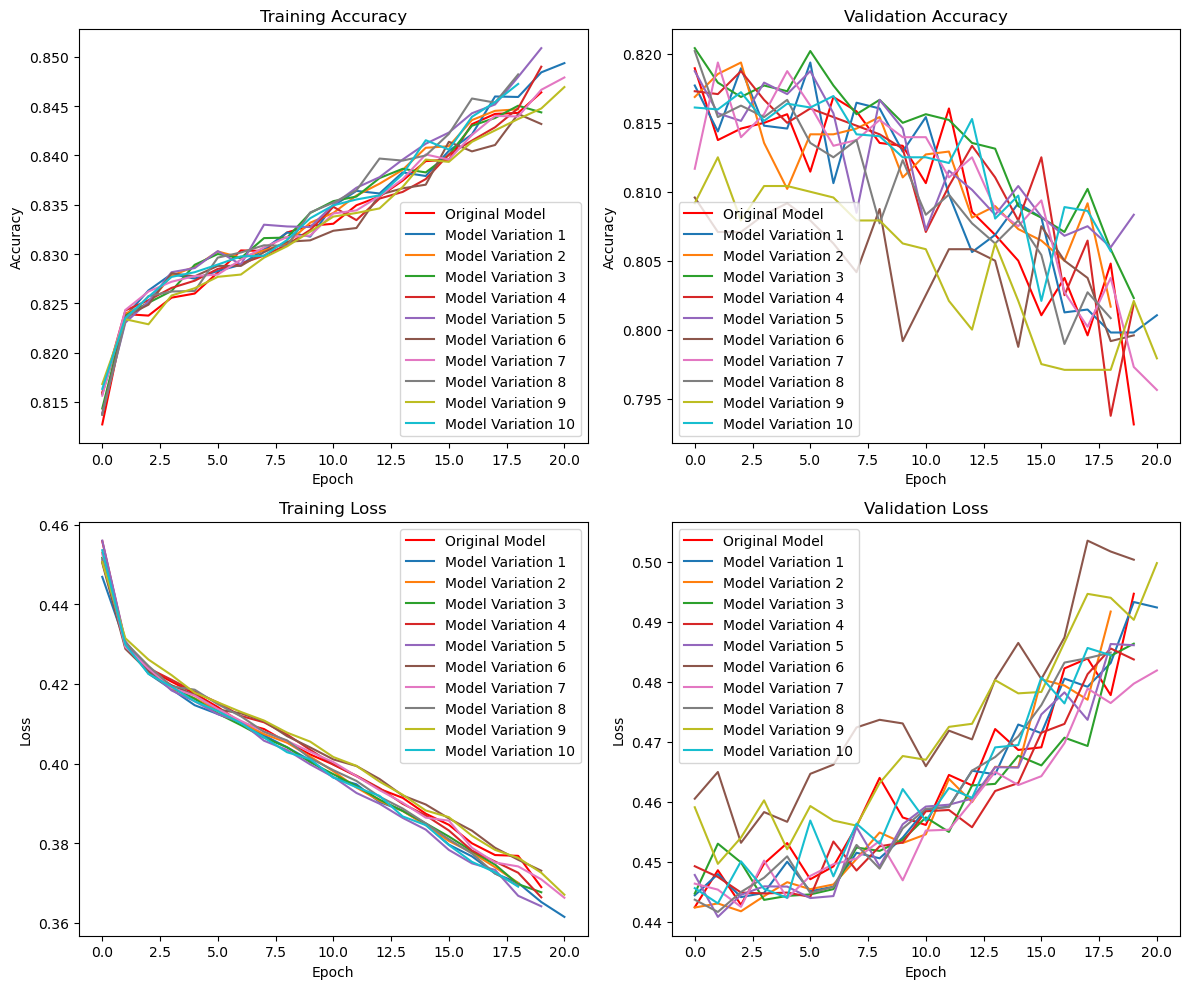

In [13]:

# Plot comparison graphs
plot_comparison_graphs(original_history, histories)


Section 3: model structure/additional hyperparameter fine tuning 


step 1: changing numbers of neuron in each layer
assume base case as 128 64 1, make 6 variations on 128 and 6 variations on 64, holding ohters constant in each try

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define the input shape
input_shape = X_train.shape[1]

# Function to create model with variations in neuron numbers for each layer
def create_model(first_layer_neurons, second_layer_neurons):
    model = Sequential()
    model.add(Dense(first_layer_neurons, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(second_layer_neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Define variations in neuron numbers for each layer
first_layer_neurons_variations = [64, 96, 128, 160, 192, 224]
second_layer_neurons_variations = [32, 48, 64, 80, 96, 112]

# Initialize a list to store the performance of each model
model_performances = []

# Initialize lists to store models and histories
models = []
histories = []

# Create and train models with variations
for first_layer_neurons in first_layer_neurons_variations:
    for second_layer_neurons in second_layer_neurons_variations:
        model = create_model(first_layer_neurons, second_layer_neurons)
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=0)
        test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
        # Extract training and validation metrics
        final_training_accuracy = history.history['accuracy'][-1]
        final_validation_accuracy = history.history['val_accuracy'][-1]
        final_training_loss = history.history['loss'][-1]
        final_validation_loss = history.history['val_loss'][-1]
        print(f"Model with {first_layer_neurons} neurons in the first layer and {second_layer_neurons} neurons in the second layer - Test Accuracy: {test_accuracy}, Training Accuracy: {final_training_accuracy}, Validation Accuracy: {final_validation_accuracy}, Training Loss: {final_training_loss}, Validation Loss: {final_validation_loss}")
        model_performances.append((test_accuracy, final_training_accuracy, final_validation_accuracy, final_training_loss, final_validation_loss, first_layer_neurons, second_layer_neurons))
        
        # Save model and history
        models.append(model)
        histories.append(history)

# Find the best performing model based on test accuracy
best_performance = max(model_performances, key=lambda x: x[0])
best_test_accuracy, best_training_accuracy, best_validation_accuracy, best_training_loss, best_validation_loss, best_first_layer_neurons, best_second_layer_neurons = best_performance

# Print the summary of the best model
print(f"\nThe best model has {best_first_layer_neurons} neurons in the first layer and {best_second_layer_neurons} neurons in the second layer with Test Accuracy: {best_test_accuracy}, Training Accuracy: {best_training_accuracy}, Validation Accuracy: {best_validation_accuracy}, Training Loss: {best_training_loss}, Validation Loss: {best_validation_loss}.\n")


Model with 64 neurons in the first layer and 32 neurons in the second layer - Test Accuracy: 0.812666654586792, Training Accuracy: 0.8387500047683716, Validation Accuracy: 0.8079166412353516, Training Loss: 0.3872203528881073, Validation Loss: 0.4688476026058197
Model with 64 neurons in the first layer and 48 neurons in the second layer - Test Accuracy: 0.8146666884422302, Training Accuracy: 0.8394270539283752, Validation Accuracy: 0.809583306312561, Training Loss: 0.3832058906555176, Validation Loss: 0.4705822765827179
Model with 64 neurons in the first layer and 64 neurons in the second layer - Test Accuracy: 0.8108333349227905, Training Accuracy: 0.8416146039962769, Validation Accuracy: 0.8066666722297668, Training Loss: 0.3821476399898529, Validation Loss: 0.47421035170555115
Model with 64 neurons in the first layer and 80 neurons in the second layer - Test Accuracy: 0.8133333325386047, Training Accuracy: 0.840833306312561, Validation Accuracy: 0.8052083253860474, Training Loss: 0.

step 2: print summaries, metrics, graphs

Model Summary with 64 neurons in the first layer and 32 neurons in the second layer:
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 64)                5888      
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8001 (31.25 KB)
Trainable params: 8001 (31.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


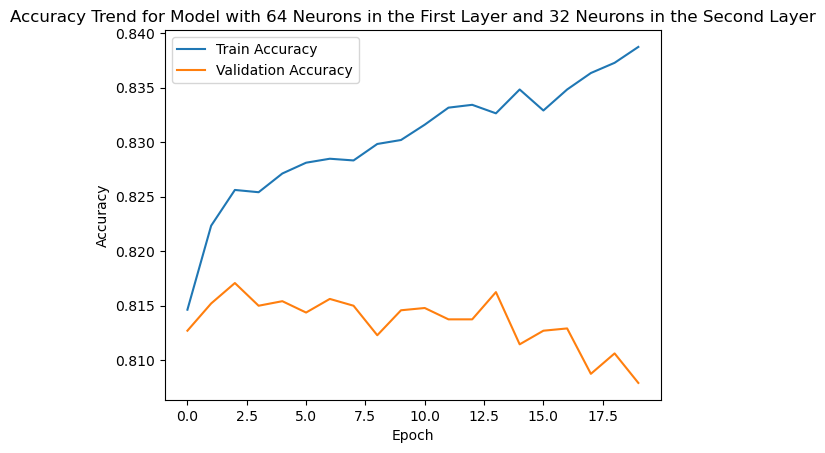

Test Accuracy: 0.812666654586792

Model Summary with 96 neurons in the first layer and 48 neurons in the second layer:
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                5888      
                                                                 
 dense_46 (Dense)            (None, 48)                3120      
                                                                 
 dense_47 (Dense)            (None, 1)                 49        
                                                                 
Total params: 9057 (35.38 KB)
Trainable params: 9057 (35.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


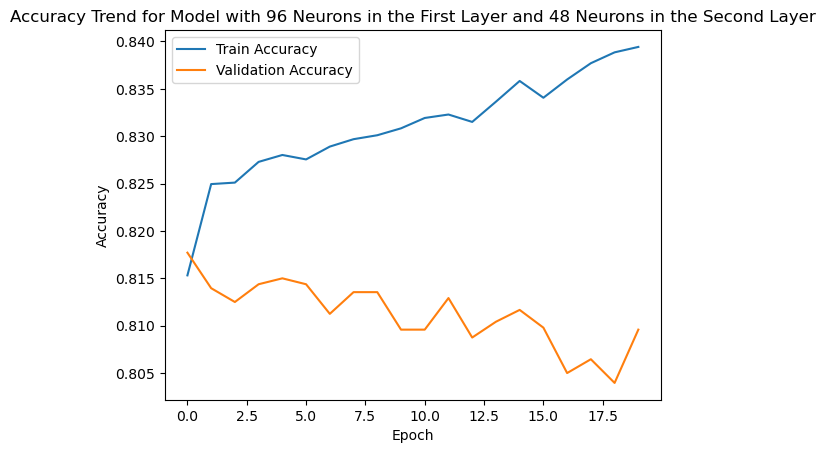

Test Accuracy: 0.8146666884422302

Model Summary with 128 neurons in the first layer and 64 neurons in the second layer:
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 64)                5888      
                                                                 
 dense_49 (Dense)            (None, 64)                4160      
                                                                 
 dense_50 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


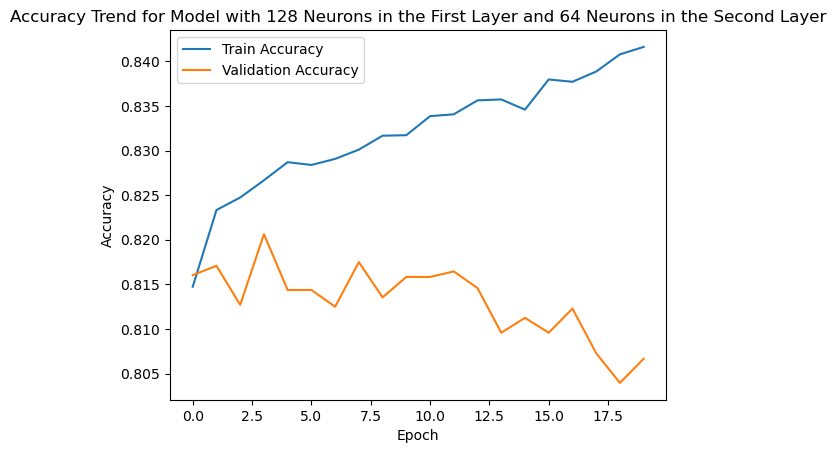

Test Accuracy: 0.8108333349227905

Model Summary with 160 neurons in the first layer and 80 neurons in the second layer:
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 64)                5888      
                                                                 
 dense_52 (Dense)            (None, 80)                5200      
                                                                 
 dense_53 (Dense)            (None, 1)                 81        
                                                                 
Total params: 11169 (43.63 KB)
Trainable params: 11169 (43.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


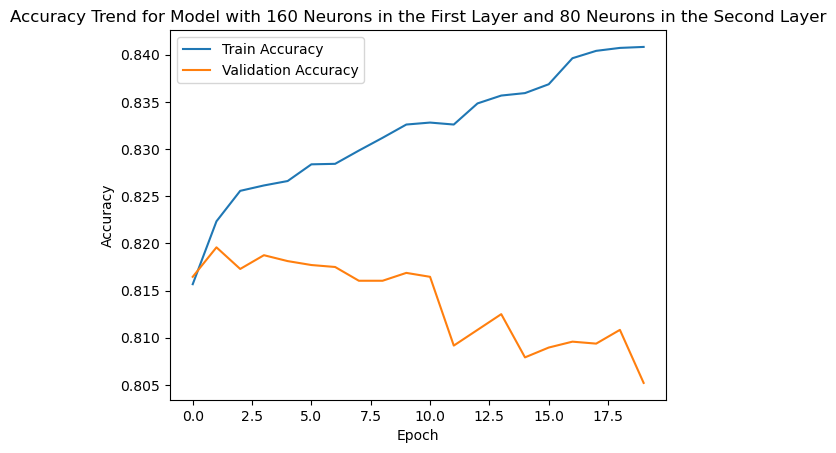

Test Accuracy: 0.8133333325386047

Model Summary with 192 neurons in the first layer and 96 neurons in the second layer:
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 64)                5888      
                                                                 
 dense_55 (Dense)            (None, 96)                6240      
                                                                 
 dense_56 (Dense)            (None, 1)                 97        
                                                                 
Total params: 12225 (47.75 KB)
Trainable params: 12225 (47.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


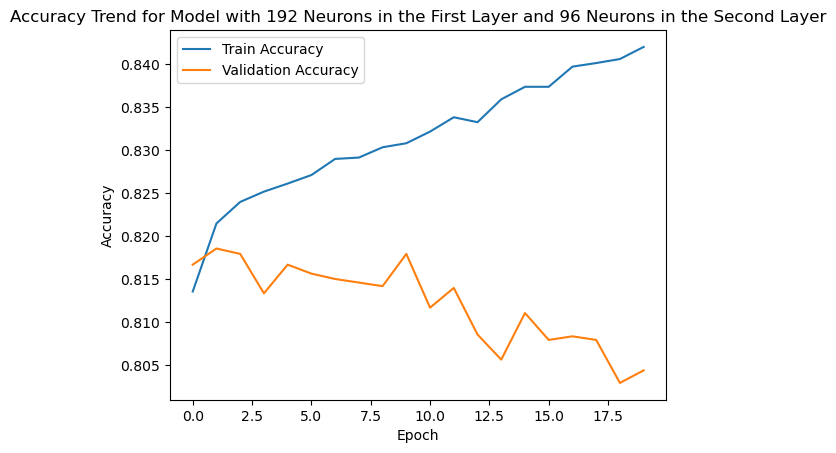

Test Accuracy: 0.8088333606719971

Model Summary with 224 neurons in the first layer and 112 neurons in the second layer:
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 64)                5888      
                                                                 
 dense_58 (Dense)            (None, 112)               7280      
                                                                 
 dense_59 (Dense)            (None, 1)                 113       
                                                                 
Total params: 13281 (51.88 KB)
Trainable params: 13281 (51.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


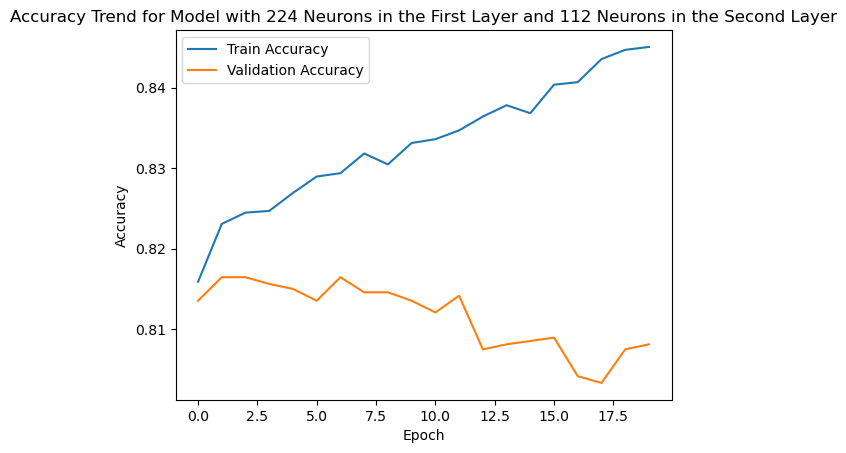

Test Accuracy: 0.8105000257492065



In [15]:
# Model Summary and Accuracy Trend Graph Block
for model, history, first_layer_neurons, second_layer_neurons in zip(models, histories, first_layer_neurons_variations, second_layer_neurons_variations):
    # Print Model Summary
    print(f"Model Summary with {first_layer_neurons} neurons in the first layer and {second_layer_neurons} neurons in the second layer:")
    model.summary()
    
    # Plot training history
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy Trend for Model with {first_layer_neurons} Neurons in the First Layer and {second_layer_neurons} Neurons in the Second Layer')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    # Evaluate model and print Test Accuracy
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy}\n")

step 3: Compare models in collectively

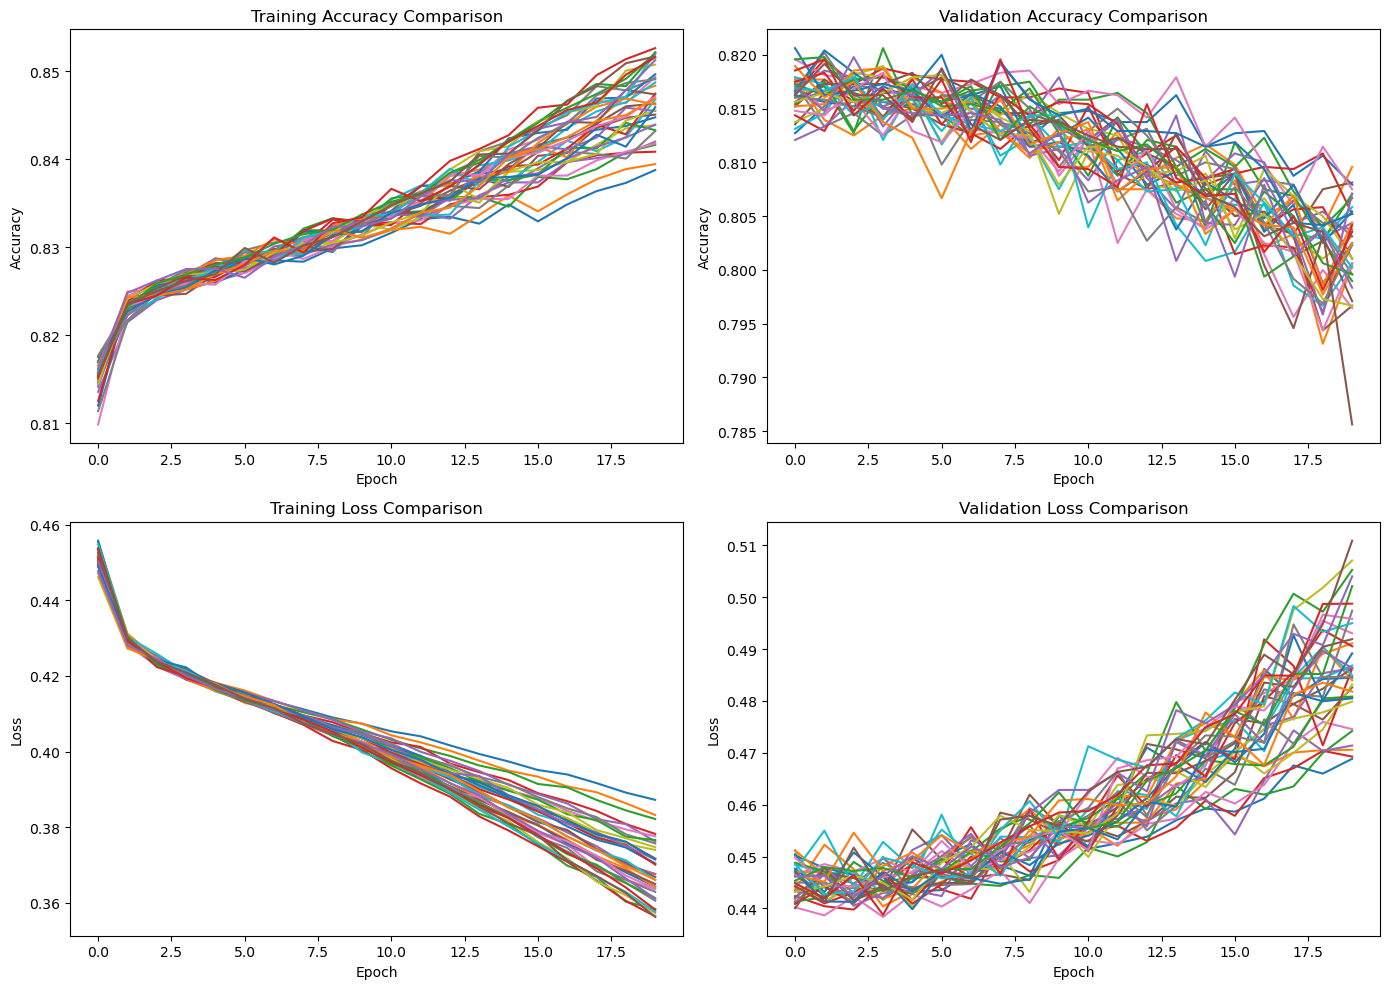

In [16]:
import matplotlib.pyplot as plt

# Initialize subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Training Accuracy Comparison
axs[0, 0].set_title('Training Accuracy Comparison')
for i, history in enumerate(histories):
    axs[0, 0].plot(history.history['accuracy'], label=f'Model {i+1}')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')
#axs[0, 0].legend()

# Plot Validation Accuracy Comparison
axs[0, 1].set_title('Validation Accuracy Comparison')
for i, history in enumerate(histories):
    axs[0, 1].plot(history.history['val_accuracy'], label=f'Model {i+1}')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Accuracy')
#axs[0, 1].legend()

# Plot Training Loss Comparison
axs[1, 0].set_title('Training Loss Comparison')
for i, history in enumerate(histories):
    axs[1, 0].plot(history.history['loss'], label=f'Model {i+1}')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Loss')
#axs[1, 0].legend()

# Plot Validation Loss Comparison
axs[1, 1].set_title('Validation Loss Comparison')
for i, history in enumerate(histories):
    axs[1, 1].plot(history.history['val_loss'], label=f'Model {i+1}')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Loss')
#axs[1, 1].legend()

plt.tight_layout()
plt.show()


step 4: box plot to see general variations of metrics

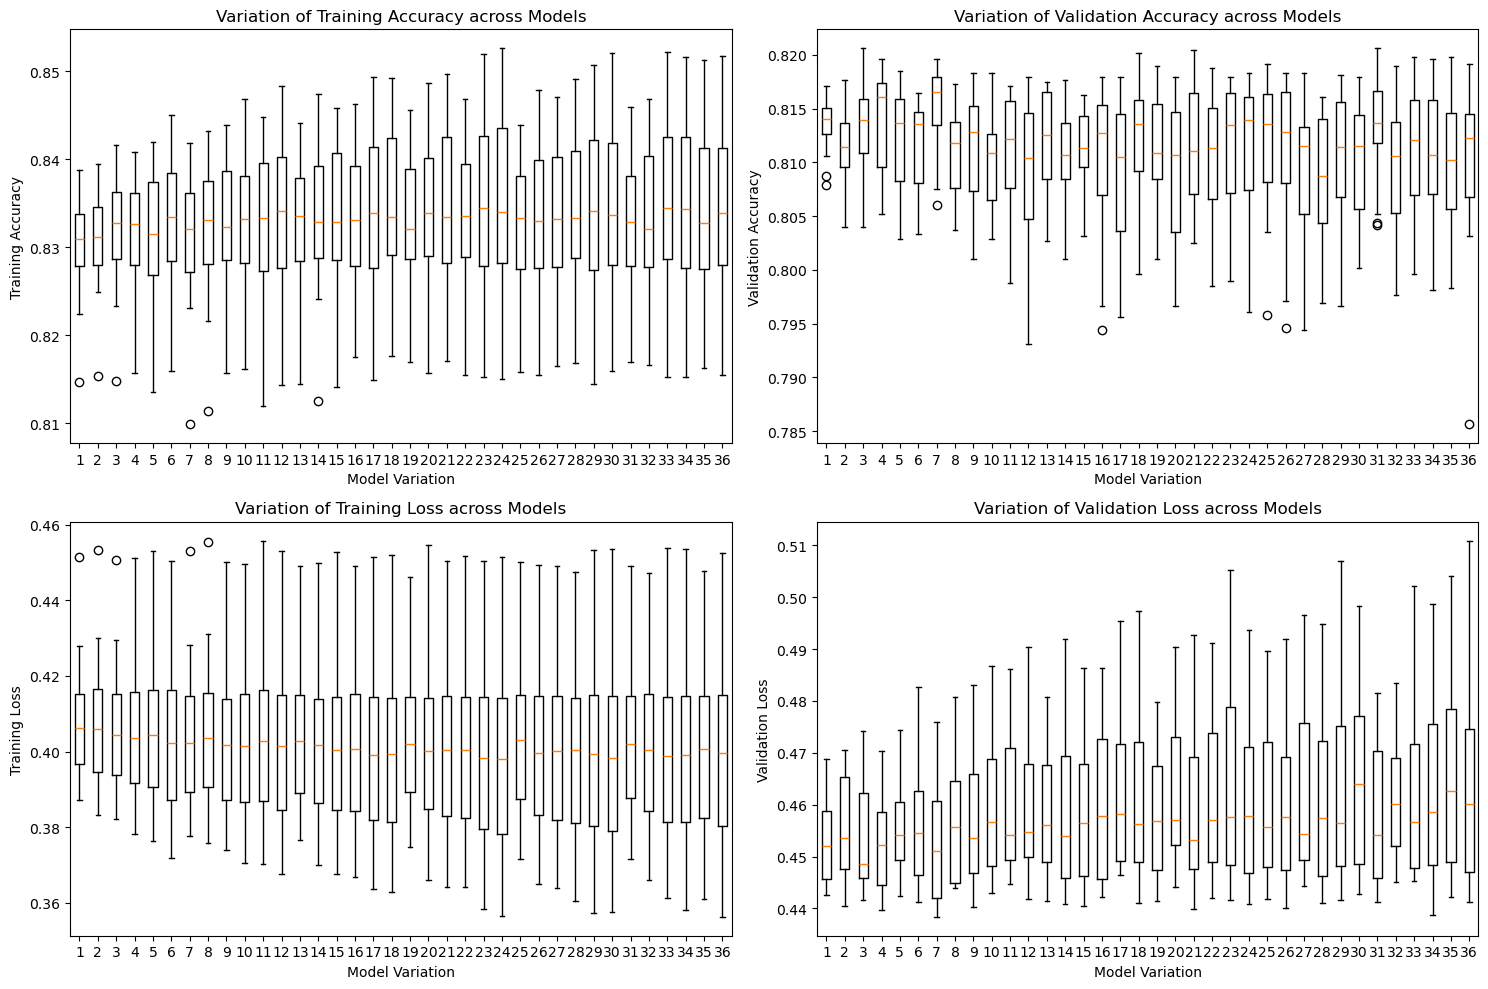

In [17]:
import matplotlib.pyplot as plt

# Extract metrics for all epochs
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

for history in histories:
    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Box plot for training accuracy
axs[0, 0].boxplot(train_accuracies, positions=range(1, len(train_accuracies)+1))
axs[0, 0].set_xlabel('Model Variation')
axs[0, 0].set_ylabel('Training Accuracy')
axs[0, 0].set_title('Variation of Training Accuracy across Models')

# Box plot for validation accuracy
axs[0, 1].boxplot(val_accuracies, positions=range(1, len(val_accuracies)+1))
axs[0, 1].set_xlabel('Model Variation')
axs[0, 1].set_ylabel('Validation Accuracy')
axs[0, 1].set_title('Variation of Validation Accuracy across Models')

# Box plot for training loss
axs[1, 0].boxplot(train_losses, positions=range(1, len(train_losses)+1))
axs[1, 0].set_xlabel('Model Variation')
axs[1, 0].set_ylabel('Training Loss')
axs[1, 0].set_title('Variation of Training Loss across Models')

# Box plot for validation loss
axs[1, 1].boxplot(val_losses, positions=range(1, len(val_losses)+1))
axs[1, 1].set_xlabel('Model Variation')
axs[1, 1].set_ylabel('Validation Loss')
axs[1, 1].set_title('Variation of Validation Loss across Models')

plt.tight_layout()
plt.show()


step 5: shaded variance trend graph

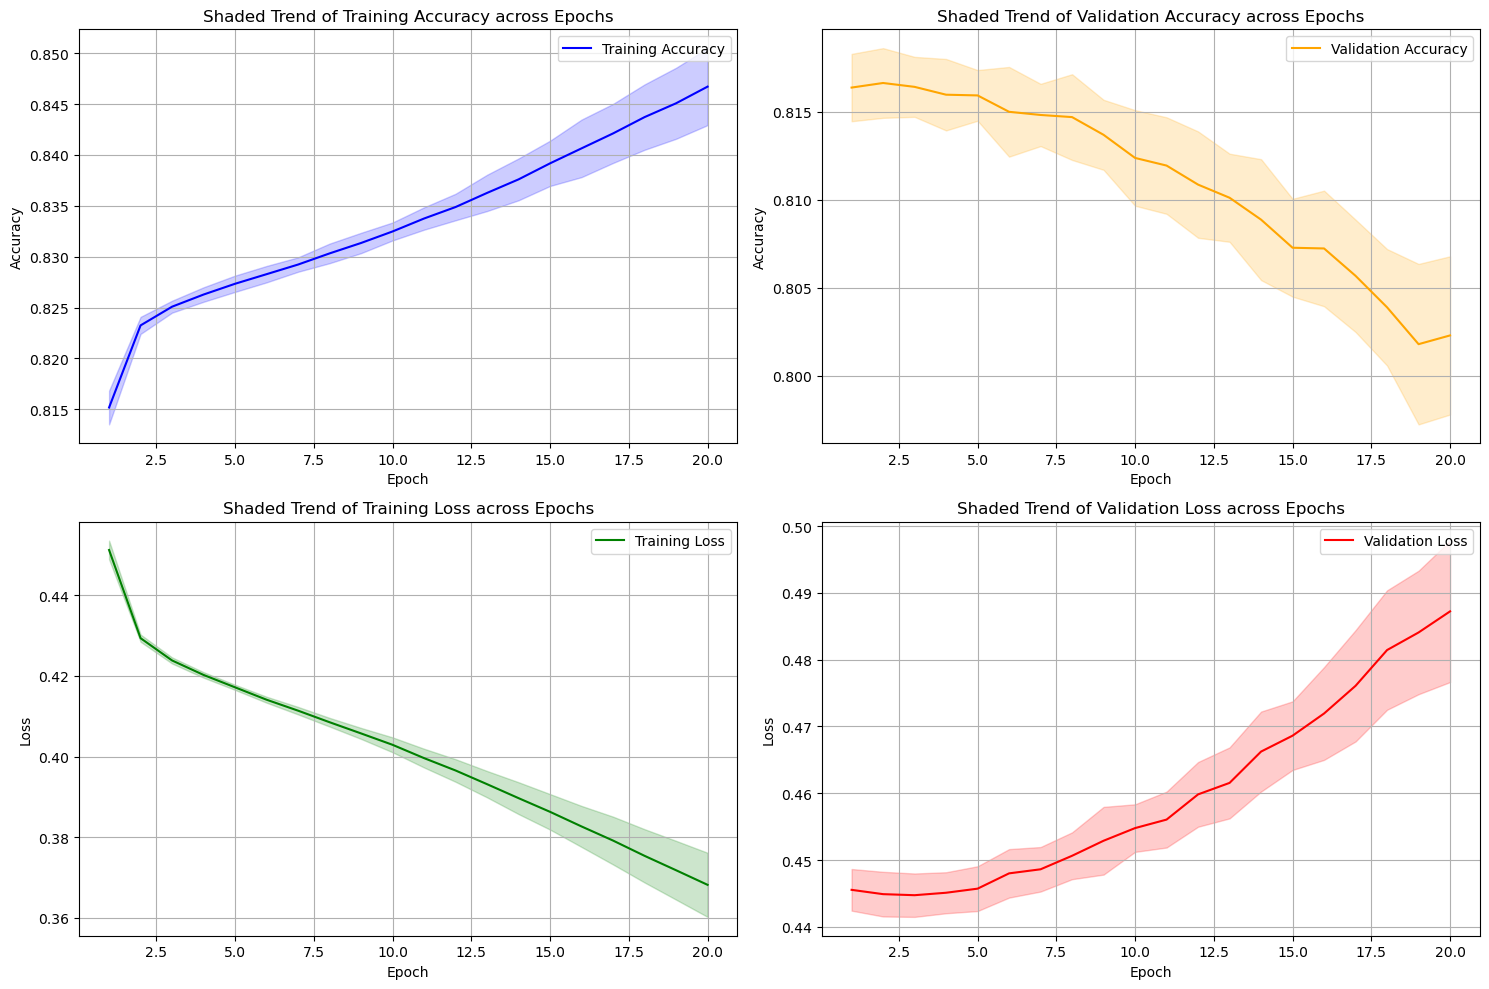

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Extract metrics for all epochs
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

for history in histories:
    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

# Calculate mean and standard deviation for each epoch
mean_train_accuracy = np.mean(train_accuracies, axis=0)
std_train_accuracy = np.std(train_accuracies, axis=0)
mean_val_accuracy = np.mean(val_accuracies, axis=0)
std_val_accuracy = np.std(val_accuracies, axis=0)
mean_train_loss = np.mean(train_losses, axis=0)
std_train_loss = np.std(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)
std_val_loss = np.std(val_losses, axis=0)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot shaded trend for training accuracy
axs[0, 0].plot(range(1, len(mean_train_accuracy) + 1), mean_train_accuracy, label='Training Accuracy', color='blue')
axs[0, 0].fill_between(range(1, len(mean_train_accuracy) + 1),
                       mean_train_accuracy - std_train_accuracy,
                       mean_train_accuracy + std_train_accuracy,
                       color='blue', alpha=0.2)
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_title('Shaded Trend of Training Accuracy across Epochs')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot shaded trend for validation accuracy
axs[0, 1].plot(range(1, len(mean_val_accuracy) + 1), mean_val_accuracy, label='Validation Accuracy', color='orange')
axs[0, 1].fill_between(range(1, len(mean_val_accuracy) + 1),
                       mean_val_accuracy - std_val_accuracy,
                       mean_val_accuracy + std_val_accuracy,
                       color='orange', alpha=0.2)
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].set_title('Shaded Trend of Validation Accuracy across Epochs')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot shaded trend for training loss
axs[1, 0].plot(range(1, len(mean_train_loss) + 1), mean_train_loss, label='Training Loss', color='green')
axs[1, 0].fill_between(range(1, len(mean_train_loss) + 1),
                       mean_train_loss - std_train_loss,
                       mean_train_loss + std_train_loss,
                       color='green', alpha=0.2)
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].set_title('Shaded Trend of Training Loss across Epochs')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot shaded trend for validation loss
axs[1, 1].plot(range(1, len(mean_val_loss) + 1), mean_val_loss, label='Validation Loss', color='red')
axs[1, 1].fill_between(range(1, len(mean_val_loss) + 1),
                       mean_val_loss - std_val_loss,
                       mean_val_loss + std_val_loss,
                       color='red', alpha=0.2)
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].set_title('Shaded Trend of Validation Loss across Epochs')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


step 6: best model

Previous code as redundant and incorporated in the main training block.

The best model has 64 neurons in the first layer and 80 neurons in the second layer with Test Accuracy: 0.8173333406448364, Training Accuracy: 0.8285416960716248, Validation Accuracy: 0.815833330154419, Training Loss: 0.4011897146701813, Validation Loss: 0.4485721290111542.


Any markdown about model results are at the moment of training at specific time. Differences are due to running models in another time.